In [32]:
#Open command prompt (Windows Power Shell) and type the following -
#pip install pandas-profiling
import numpy as np
import pandas as pd
import pandas_profiling 

#Importing train and test datasets
data_path = "C:/Users/Sharath P Dandamudi/Desktop/Dataset/"
train_file = data_path + "train.xlsx"
test_file = data_path +  "test.xlsx"

train = pd.read_excel(train_file,header=0) 
test = pd.read_excel(test_file,header=0) 

In [6]:
#Checking the dimensions of train and test datasets
print train.shape,test.shape

(87020, 27) (37717, 25)


In [7]:
#Checking the data types in train dataset
train.dtypes

ID                               object
Gender                           object
City                             object
Monthly_Income                    int64
DOB                      datetime64[ns]
Lead_Creation_Date       datetime64[ns]
Loan_Amount_Applied             float64
Loan_Tenure_Applied             float64
Existing_EMI                    float64
Employer_Name                    object
Salary_Account                   object
Mobile_Verified                  object
Var5                              int64
Var1                             object
Loan_Amount_Submitted           float64
Loan_Tenure_Submitted           float64
Interest_Rate                   float64
Processing_Fee                  float64
EMI_Loan_Submitted              float64
Filled_Form                      object
Device_Type                      object
Var2                             object
Source                           object
Var4                              int64
LoggedIn                          int64


In [8]:
#Combine train and test into a dataset
train['source']= 'train'
test['source'] = 'test'
data=pd.concat([train, test],ignore_index=True)
data.shape

(124737, 27)

In [11]:
#EDA 
pfr = pandas_profiling.ProfileReport(data)
output_file = data_path + "eda_output.html"
pfr.to_file(output_file) 

In [12]:
#Computing missing value proportion for all variables in the dataset
data.apply(lambda x: round(float(sum(x.isnull()))/len(x) * 100))

City                      1.0
DOB                       0.0
Device_Type               0.0
Disbursed                30.0
EMI_Loan_Submitted       68.0
Employer_Name             0.0
Existing_EMI              0.0
Filled_Form               0.0
Gender                    0.0
ID                        0.0
Interest_Rate            68.0
Lead_Creation_Date        0.0
Loan_Amount_Applied       0.0
Loan_Amount_Submitted    40.0
Loan_Tenure_Applied       0.0
Loan_Tenure_Submitted    40.0
LoggedIn                 30.0
Mobile_Verified           0.0
Monthly_Income            0.0
Processing_Fee           68.0
Salary_Account           13.0
Source                    0.0
Var1                      0.0
Var2                      0.0
Var4                      0.0
Var5                      0.0
source                    0.0
dtype: float64

In [14]:
#Creating a list of categorical and continuous variables in data
cat_columns = data.select_dtypes(['object']).columns
num_columns = data.select_dtypes(['float64','int64']).columns

In [15]:
#Computing frequency distribution for all categorical variables in data
for v in cat_columns:
    print '\n"%s"'%v
    print 'Frequency count for categorical variable "%s"'%v
    print data[v].value_counts()


"City"
Frequency count for categorical variable "City"
Delhi                  17936
Bengaluru              15522
Mumbai                 15425
Hyderabad              10410
Chennai                 9895
Pune                    7427
Kolkata                 4282
Ahmedabad               2528
Jaipur                  1892
Gurgaon                 1743
Coimbatore              1659
Thane                   1306
Chandigarh              1266
Surat                   1149
Visakhapatnam           1080
Indore                  1051
Vadodara                 893
Nagpur                   879
Lucknow                  813
Ghaziabad                795
Bhopal                   735
Kochi                    692
Patna                    675
Faridabad                651
Noida                    549
Madurai                  534
Gautam Buddha Nagar      485
Dehradun                 444
Raipur                   430
Bhubaneswar              407
                       ...  
Sawai Madhopur             1
SOMNATH JUNAGADH

In [16]:
#Computing # of unique categories per class
for v in cat_columns:
    print '\n"%s"'%v
    print 'Unique count for categorical variable "%s"'%v
    print len(data[v].unique())


"City"
Unique count for categorical variable "City"
724

"Device_Type"
Unique count for categorical variable "Device_Type"
2

"Employer_Name"
Unique count for categorical variable "Employer_Name"
57194

"Filled_Form"
Unique count for categorical variable "Filled_Form"
2

"Gender"
Unique count for categorical variable "Gender"
2

"ID"
Unique count for categorical variable "ID"
124737

"Mobile_Verified"
Unique count for categorical variable "Mobile_Verified"
2

"Salary_Account"
Unique count for categorical variable "Salary_Account"
59

"Source"
Unique count for categorical variable "Source"
34

"Var1"
Unique count for categorical variable "Var1"
19

"Var2"
Unique count for categorical variable "Var2"
7

"source"
Unique count for categorical variable "source"
2


In [17]:
#Descriptive statistics of all continuous variables in dataset
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
data.describe()

,Disbursed,EMI_Loan_Submitted,Existing_EMI,Interest_Rate,Loan_Amount_Applied,Loan_Amount_Submitted,Loan_Tenure_Applied,Loan_Tenure_Submitted,LoggedIn,Monthly_Income,Processing_Fee,Var4,Var5
count,87020.000,39836.000,1.246e+05,39836.000,1.246e+05,7.520e+04,124626.000,75202.000,87020.000,1.247e+05,39391.000,124737.000,124737.000
mean,0.015,10982.550,3.636e+03,19.217,2.300e+05,3.949e+05,2.138,3.896,0.029,5.309e+04,5124.418,2.951,4.965
std,0.120,7466.525,3.369e+04,5.846,3.541e+05,3.074e+05,2.016,1.161,0.169,1.823e+06,4730.698,1.695,5.670
min,0.000,1176.410,0.000e+00,11.990,0.000e+00,5.000e+04,0.000,1.000,0.000,0.000e+00,200.000,0.000,0.000
25%,0.000,6390.380,0.000e+00,15.150,0.000e+00,2.000e+05,0.000,3.000,0.000,1.650e+04,2000.000,1.000,0.000
50%,0.000,9409.230,0.000e+00,18.000,1.000e+05,3.000e+05,2.000,4.000,0.000,2.500e+04,3900.000,3.000,2.000
75%,0.000,12909.270,3.500e+03,20.000,3.000e+05,5.000e+05,4.000,5.000,0.000,4.000e+04,6250.000,5.000,11.000
max,1.000,144748.280,1.000e+07,37.000,1.500e+07,3.000e+06,10.000,6.000,1.000,4.446e+08,50000.000,7.000,18.000


In [23]:
#Class distribution
train.groupby('Disbursed').size()

Disbursed
0    85747
1     1273
dtype: int64

In [30]:
#Computing Pairwise Pearson correlations
pd.set_option('display.width', 100)
pd.set_option('precision', 3)

correlations=data.corr(method='pearson')

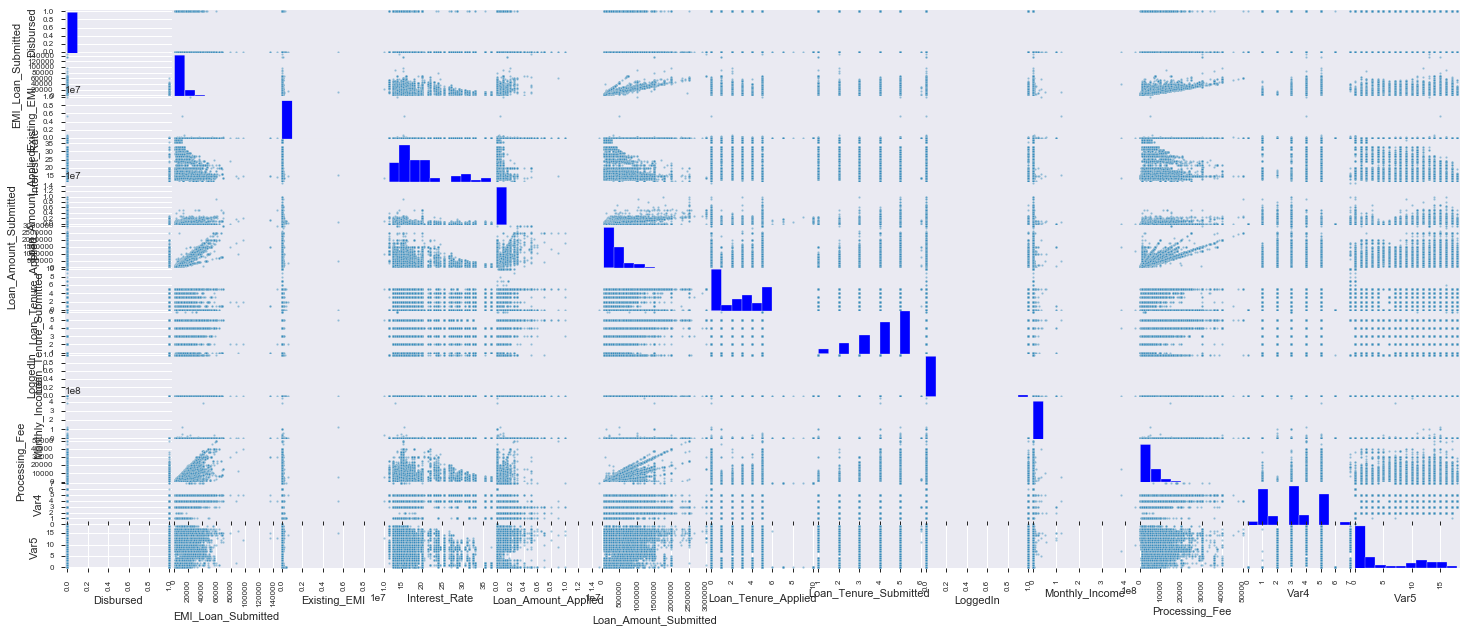

In [28]:
#Subsetting data that consists of only continuous variables
data_cont_columns=data[num_columns]

%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 25,10
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data_cont_columns)
plt.show()

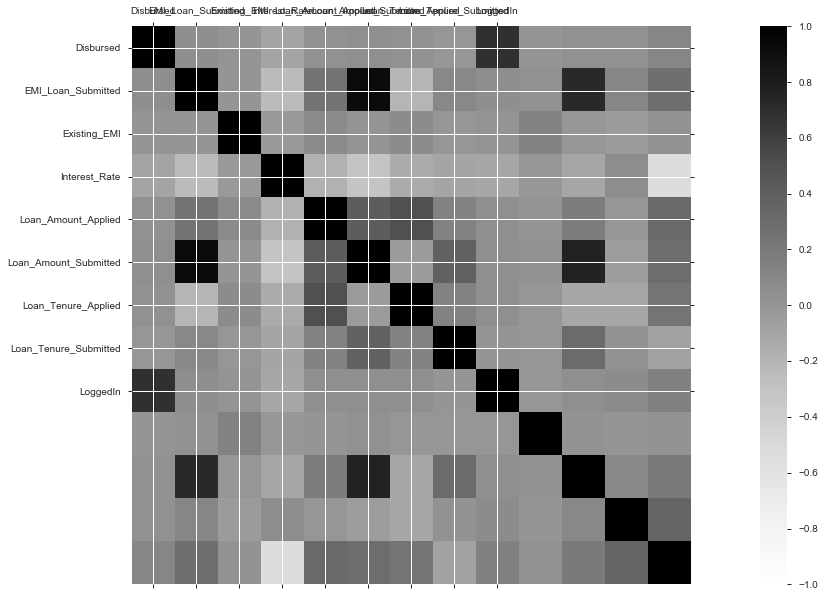

In [34]:
# Plotting correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(data_cont_columns)
ax.set_yticklabels(data_cont_columns)
plt.show()

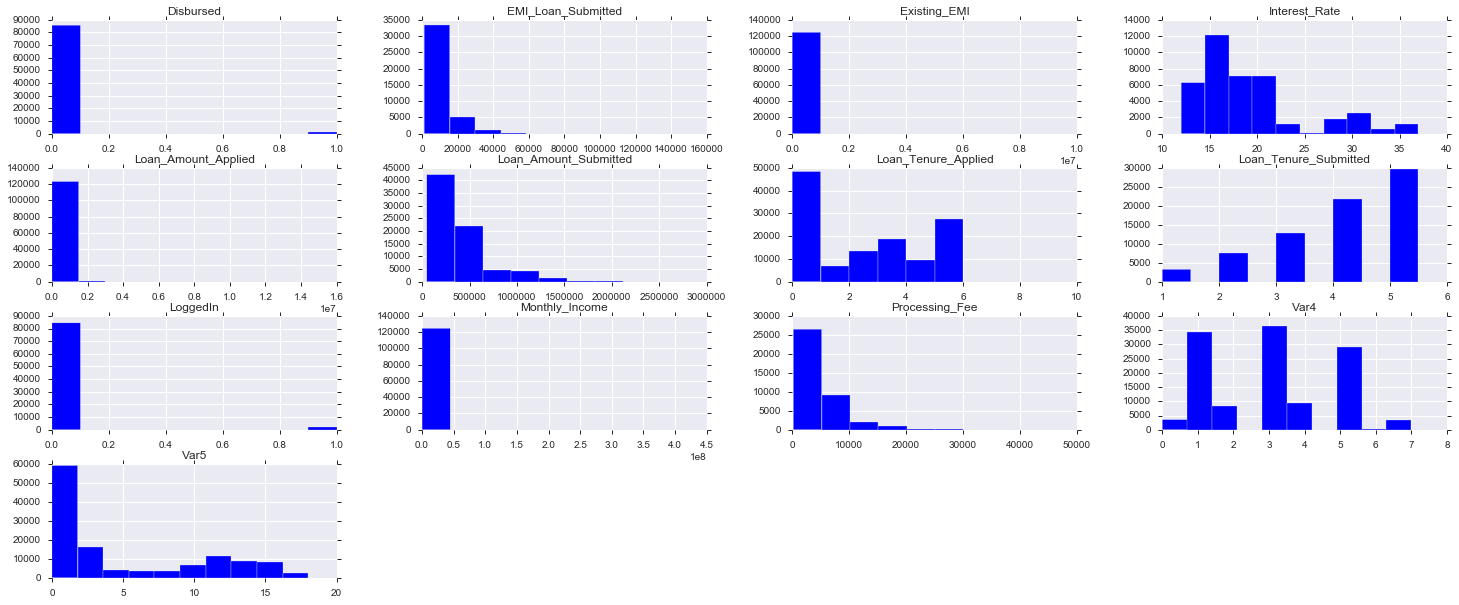

In [35]:
#Plotting univariate Histograms
data.hist()
plt.show()

KeyboardInterrupt: 

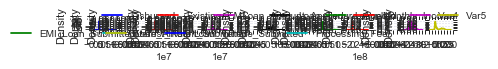

In [41]:
#Plotting univariate Density Plots
data.plot(kind='density', subplots=True, layout=(10,10), sharex=False)
plt.show()

In [51]:
#Imputing missing values with median for continuous variables
for v in num_columns:
    data[v].fillna(data[v].median(),inplace=True)
data.head(10)

,City,DOB,Device_Type,Disbursed,EMI_Loan_Submitted,Employer_Name,Existing_EMI,Filled_Form,Gender,ID,...,Mobile_Verified,Monthly_Income,Processing_Fee,Salary_Account,Source,Var1,Var2,Var4,Var5,source
0,Delhi,1978-05-23,Web-browser,0.0,9409.23,CYBOSOL,0.0,N,Female,ID000002C20,...,N,20000,3900.0,HDFC Bank,S122,HBXX,G,1,0,train
1,Mumbai,1985-10-07,Web-browser,0.0,6762.90,TATA CONSULTANCY SERVICES LTD (TCS),0.0,N,Male,ID000004E40,...,Y,35000,3900.0,ICICI Bank,S122,HBXA,G,3,13,train
2,Panchkula,1981-10-10,Web-browser,0.0,9409.23,ALCHEMIST HOSPITALS LTD,0.0,N,Male,ID000007H20,...,Y,22500,3900.0,State Bank of India,S143,HBXX,B,1,0,train
3,Saharsa,1987-11-30,Web-browser,0.0,9409.23,BIHAR GOVERNMENT,0.0,N,Male,ID000008I30,...,Y,35000,3900.0,State Bank of India,S143,HBXX,B,3,10,train
4,Bengaluru,1984-02-17,Web-browser,0.0,9409.23,GLOBAL EDGE SOFTWARE,25000.0,N,Male,ID000009J40,...,Y,100000,3900.0,HDFC Bank,S134,HBXX,B,3,17,train
5,Bengaluru,1982-04-21,Web-browser,0.0,6978.92,COGNIZANT TECHNOLOGY SOLUTIONS INDIA PVT LTD,15000.0,N,Male,ID000010K00,...,Y,45000,1500.0,HSBC,S143,HAXM,B,3,17,train
6,Sindhudurg,1987-10-23,Web-browser,0.0,9409.23,CARNIVAL CRUISE LINE,0.0,N,Female,ID000011L10,...,N,70000,3900.0,Yes Bank,S133,HBXX,B,1,0,train
7,Bengaluru,1975-07-25,Web-browser,0.0,9409.23,GOLDEN TULIP FLORITECH PVT. LTD,2597.0,N,Male,ID000012M20,...,Y,20000,3900.0,NaN,S159,HBXX,B,3,3,train
8,Kochi,1972-01-26,Mobile,0.0,30824.65,SIIS PVT LTD,0.0,Y,Male,ID000013N30,...,Y,75000,26000.0,State Bank of India,S122,HAXB,C,5,13,train
9,Mumbai,1989-09-12,Web-browser,0.0,10883.38,SOUNDCLOUD.COM,0.0,N,Female,ID000014O40,...,Y,30000,1500.0,Kotak Bank,S133,HBXC,B,1,0,train


In [53]:
#Imputing missing values with mode for categorical variables
for v in cat_columns:
    data[v].fillna(data[v].mode(),inplace=True)
data.apply(lambda x: round(float(sum(x.isnull()))/len(x) * 100))

City                      1.0
DOB                       0.0
Device_Type               0.0
Disbursed                 0.0
EMI_Loan_Submitted        0.0
Employer_Name             0.0
Existing_EMI              0.0
Filled_Form               0.0
Gender                    0.0
ID                        0.0
Interest_Rate             0.0
Lead_Creation_Date        0.0
Loan_Amount_Applied       0.0
Loan_Amount_Submitted     0.0
Loan_Tenure_Applied       0.0
Loan_Tenure_Submitted     0.0
LoggedIn                  0.0
Mobile_Verified           0.0
Monthly_Income            0.0
Processing_Fee            0.0
Salary_Account           13.0
Source                    0.0
Var1                      0.0
Var2                      0.0
Var4                      0.0
Var5                      0.0
source                    0.0
dtype: float64